In [2]:
"""
1. Create your own regression dataset (or make the one we created in "Create data to
view and fit" bigger) and build fit a model to it.
"""
# Ommited exercise. Same as exercise 3 and 4.
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
"""
2. Try building a neural network with 4 Dense layers and fitting it to your own
regression dataset, how does it perform?
"""
# Omitted. Same as exercise 3 and 4.

'\n2. Try building a neural network with 4 Dense layers and fitting it to your own\nregression dataset, how does it perform?\n'

In [4]:
"""
3. Try and improve the results we got on the insurance dataset, some things you might
want to try include:
  • Building a larger model (how does one with 4 dense layers go?).
  • Increasing the number of units in each layer.
  • Lookup the documentation of Adam and find out what the first parameter is, what
happens if you increase it by 10x?
  • What happens if you train for longer (say 300 epochs instead of 200)?
"""
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

#Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
# For preprocessing
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
(MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
(OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker","region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar)
# and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

# Set random seed
tf.random.set_seed(42)
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])


model1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001*10), # Adam works but SGD doesn't
               metrics=['mae'])
# Fit the model and save the history (we can plot this)
history = model1.fit(X_train_normal, y_train, epochs=300)

Epoch 1/300
34/34 [==============================] - 2s 5ms/step - loss: 10629.0234 - mae: 10629.0234
Epoch 2/300
34/34 [==============================] - 0s 4ms/step - loss: 6336.7534 - mae: 6336.7534
Epoch 3/300
34/34 [==============================] - 0s 3ms/step - loss: 3918.6658 - mae: 3918.6658
Epoch 4/300
34/34 [==============================] - 0s 3ms/step - loss: 3683.8809 - mae: 3683.8809
Epoch 5/300
34/34 [==============================] - 0s 3ms/step - loss: 3814.4644 - mae: 3814.4644
Epoch 6/300
34/34 [==============================] - 0s 5ms/step - loss: 3622.5215 - mae: 3622.5215
Epoch 7/300
34/34 [==============================] - 0s 3ms/step - loss: 3604.9954 - mae: 3604.9954
Epoch 8/300
34/34 [==============================] - 0s 4ms/step - loss: 3674.5837 - mae: 3674.5837
Epoch 9/300
34/34 [==============================] - 0s 3ms/step - loss: 3815.3252 - mae: 3815.3252
Epoch 10/300
34/34 [==============================] - 0s 3ms/step - loss: 3702.9951 - mae: 3702.99

In [13]:
# Evaluate our larger model
model1.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 2920.1294 - mae: 2920.1294


[2920.12939453125, 2920.12939453125]

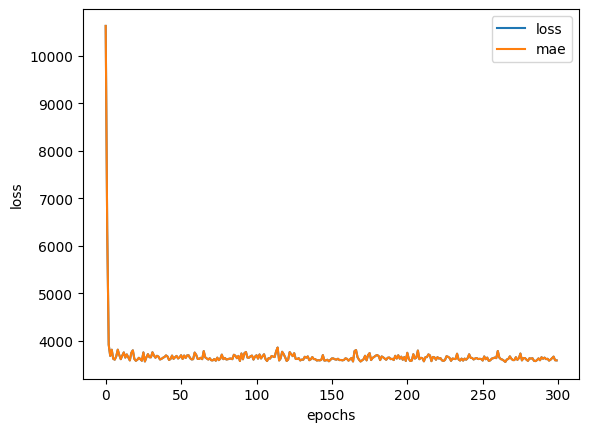

In [14]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [8]:
"""
4. Import the Boston pricing dataset from TensorFlow tf.keras.datasets and
model it. (Note: tf.keras.datasets.boston_housing module is already preprocessed
and ready for use)

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's
"""
boston = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [27]:
# Preprocessing


X = boston.drop("medv", axis=1) # Specifies that the operation should be performed along the columns.
y = boston["medv"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2);

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae'])

history2 = model2.fit(X_train, y_train, epochs=200)

Epoch 1/200
13/13 [==============================] - 1s 2ms/step - loss: 56.5706 - mae: 56.5706
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 18.4730 - mae: 18.4730
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 8.5210 - mae: 8.5210
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 7.0517 - mae: 7.0517
Epoch 5/200
13/13 [==============================] - 0s 2ms/step - loss: 7.6350 - mae: 7.6350
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 10.5956 - mae: 10.5956
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 8.7478 - mae: 8.7478
Epoch 8/200
13/13 [==============================] - 0s 2ms/step - loss: 7.1836 - mae: 7.1836
Epoch 9/200
13/13 [==============================] - 0s 2ms/step - loss: 6.9414 - mae: 6.9414
Epoch 10/200
13/13 [==============================] - 0s 2ms/step - loss: 7.7467 - mae: 7.7467
Epoch 11/200
13/13 [==============================] -

In [28]:
# Evaluate our larger model
model2.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 4.8685 - mae: 4.8685


[4.868495941162109, 4.868495941162109]

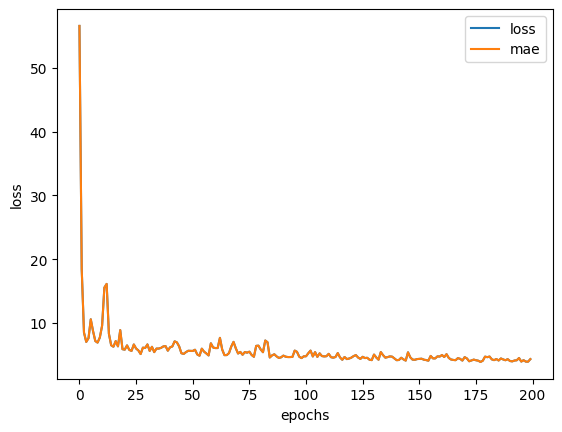

In [29]:
# Plot history (also known as a loss curve)
pd.DataFrame(history2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");